In [1]:
from packages import *

In [2]:
# def calc_precip(cum_precip, bucket_precip):
#     return  cum_precip + bucket_precip * 100.0

In [3]:
# path = '/bsuhome/stanleyakor/scratch/wsm6/wsm6_wy_sub_WY_sliced.nc'
# d = xr.open_dataset(path)
# d = d.swap_dims({'Time':'XTIME'})
# # Daily Aggregations (hourly to daily)
# d['PRCP'] = d['RAINNC']
# d['PRCP'].values = calc_precip(d['RAINNC'],d['I_RAINNC'])
# new_array = d[['SNOW','T2','SNOWH']].resample(XTIME = '24H').mean(dim = 'XTIME') # create daily means of few variables
# new_array['TMIN'] = d['T2'].resample(XTIME = '24H').min(dim = 'XTIME') # create daily minimum temperature
# new_array['PRCP'] = d['PRCP'].resample(XTIME = '24H').max(dim = 'XTIME')

# new_array.to_netcdf("short.nc")

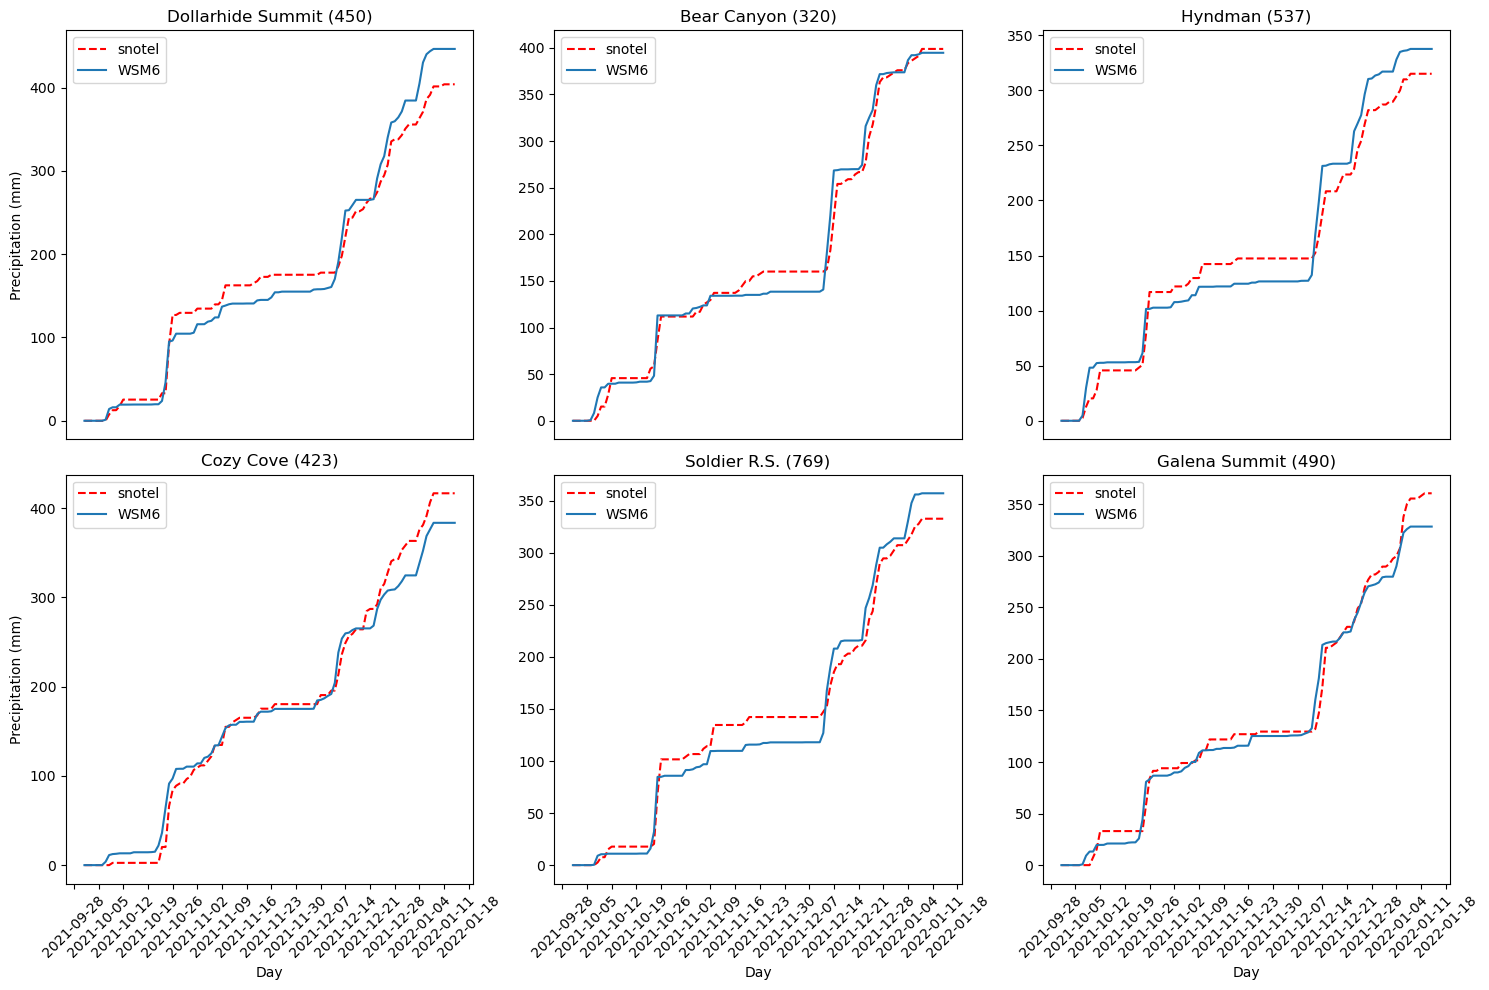

In [4]:

x = getclosest('NRCS_SNOTEL_Locations_noAlaska.csv','temp1',\
               '/bsuhome/stanleyakor/scratch/WY_22_THOMPSON/wrfout_d02_2021-09-29_00:00:00',\
               '/bsuhome/stanleyakor/Python-tutorial/wrf-python/short.nc', 'WSM6_TEST')
x.compare_smallest()